In [1]:
import requests as req
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
home_url = "https://www.sharesansar.com/"

In [3]:
res = req.get(home_url)

In [4]:
res.status_code

200

In [5]:
headers = res.headers['Set-Cookie']

In [6]:
headers = headers.split(',')
headers.pop(1)
headers

['XSRF-TOKEN=eyJpdiI6ImtHWHlHcDQ3RWUwZGhOYkphcENpQnc9PSIsInZhbHVlIjoiaGJ2d1M0YnRyRXRTYkc3ZXZkUmh6MmtKZmZFQzc3cTduZ21SaWJsUnNPdElYdzBjQnpEWFp4akxXUHBzU0dmZG5ZWTJTd29aZnNQVHlMYlI1MHJpVTdoRUpXUXVpYXNBWk9oajh6djdvRGtGN0F4RGhVWThzNTNuTitoQ2hrcjgiLCJtYWMiOiJjNjUwYTBjZDdmZDY3MzQ0M2Y5ZTY3ZDEyMDhlZWM4ZTE4MjVhZGIxMjQwNjJiZDlmNTc5MmI5ZWMyOWY1ZThmIn0%3D; expires=Tue',
 ' sharesansar_session=eyJpdiI6IjhyWFBuaE9mUlVYd0pzaVhWS0kwNWc9PSIsInZhbHVlIjoiTnE1MWhGa2tta3R2WHl1Tnp0VGxqQTdmYWhmcGtEenlaQjhjZnZFRDVzeUh0SmFaczMzM21aZzNJaU0vQ1FKWFQrcGFDVHNOTGt3eGZGUnZNcE5MaGVCOHkvL2lNTnBxYzNoZFVxTlg0SWxDcUxTcmgybCtkbHdjM05ZRWhTUGEiLCJtYWMiOiIwMWMyZWFmZGFkMDI0YTJhNTFlOWU2ZjMyZWM1MTY3YmJhNTE3ZWYwOTFjOWUxMGFmMjViMzU1NGJiNGJhNzMzIn0%3D; path=/; httponly']

In [7]:
token = headers[0].split(';')
token = token[0].split('=')[1].strip()
token

'eyJpdiI6ImtHWHlHcDQ3RWUwZGhOYkphcENpQnc9PSIsInZhbHVlIjoiaGJ2d1M0YnRyRXRTYkc3ZXZkUmh6MmtKZmZFQzc3cTduZ21SaWJsUnNPdElYdzBjQnpEWFp4akxXUHBzU0dmZG5ZWTJTd29aZnNQVHlMYlI1MHJpVTdoRUpXUXVpYXNBWk9oajh6djdvRGtGN0F4RGhVWThzNTNuTitoQ2hrcjgiLCJtYWMiOiJjNjUwYTBjZDdmZDY3MzQ0M2Y5ZTY3ZDEyMDhlZWM4ZTE4MjVhZGIxMjQwNjJiZDlmNTc5MmI5ZWMyOWY1ZThmIn0%3D'

In [8]:
share_sess = headers[1].split(';')
share_sess = share_sess[0].split('=')[1].strip()
share_sess

'eyJpdiI6IjhyWFBuaE9mUlVYd0pzaVhWS0kwNWc9PSIsInZhbHVlIjoiTnE1MWhGa2tta3R2WHl1Tnp0VGxqQTdmYWhmcGtEenlaQjhjZnZFRDVzeUh0SmFaczMzM21aZzNJaU0vQ1FKWFQrcGFDVHNOTGt3eGZGUnZNcE5MaGVCOHkvL2lNTnBxYzNoZFVxTlg0SWxDcUxTcmgybCtkbHdjM05ZRWhTUGEiLCJtYWMiOiIwMWMyZWFmZGFkMDI0YTJhNTFlOWU2ZjMyZWM1MTY3YmJhNTE3ZWYwOTFjOWUxMGFmMjViMzU1NGJiNGJhNzMzIn0%3D'

In [9]:
soup = BeautifulSoup(res.text, 'lxml')

In [10]:
meta_token = soup.find('meta', attrs={"name": "_token"})['content'].strip()
meta_token

'9mxg0CdHu8akT749h3fvoYMhejhLP61LpjOBBcAo'

In [14]:
headers = {
    "accept": "application/json",
    "origin": "https://www.sharesansar.com",
    "x-csrf-token": meta_token,
    "x-requested-with": "XMLHttpRequest",
}

cookies = {
    "XSRF-TOKEN": token,
    "sharesansar_session": share_sess
}

data = {
      'draw': '1',
      'columns[0][data]': 'DT_Row_Index',
      'columns[0][name]': '',
      'columns[0][searchable]': 'false',
      'columns[0][orderable]': 'false',
      'columns[0][search][value]': '',
      'columns[0][search][regex]': 'false',
      'columns[1][data]': 'published_date',
      'columns[1][name]': '',
      'columns[1][searchable]': 'true',
      'columns[1][orderable]': 'false',
      'columns[1][search][value]': '',
      'columns[1][search][regex]': 'false',
      'columns[2][data]': 'open',
      'columns[2][name]': '',
      'columns[2][searchable]': 'false',
      'columns[2][orderable]': 'false',
      'columns[2][search][value]': '',
      'columns[2][search][regex]': 'false',
      'columns[3][data]': 'high',
      'columns[3][name]': '',
      'columns[3][searchable]': 'false',
      'columns[3][orderable]': 'false',
      'columns[3][search][value]': '',
      'columns[3][search][regex]': 'false',
      'columns[4][data]': 'low',
      'columns[4][name]': '',
      'columns[4][searchable]': 'false',
      'columns[4][orderable]': 'false',
      'columns[4][search][value]': '',
      'columns[4][search][regex]': 'false',
      'columns[5][data]': 'close',
      'columns[5][name]': '',
      'columns[5][searchable]': 'false',
      'columns[5][orderable]': 'false',
      'columns[5][search][value]': '',
      'columns[5][search][regex]': 'false',
      'columns[6][data]': 'per_change',
      'columns[6][name]': '',
      'columns[6][searchable]': 'false',
      'columns[6][orderable]': 'false',
      'columns[6][search][value]': '',
      'columns[6][search][regex]': 'false',
      'columns[7][data]': 'traded_quantity',
      'columns[7][name]': '',
      'columns[7][searchable]': 'false',
      'columns[7][orderable]': 'false',
      'columns[7][search][value]': '',
      'columns[7][search][regex]': 'false',
      'columns[8][data]': 'traded_amount',
      'columns[8][name]': '',
      'columns[8][searchable]': 'false',
      'columns[8][orderable]': 'false',
      'columns[8][search][value]': '',
      'columns[8][search][regex]': 'false',
      'start': '0',
      'length': '50',
      'search[value]': '',
      'search[regex]': 'false',
      'company': '2',
  }

historical_url = f"https://www.sharesansar.com/company-price-history"

In [15]:
historical_res = req.post(historical_url, headers=headers, cookies=cookies, data=data)

In [16]:
historical_res = historical_res.json()
length = historical_res.get('recordsTotal')
print(length)

2909


In [17]:
ctr = 0
historical_data = []
while ctr <= length:
  data.update({"start": ctr})

  historical_res = req.post(historical_url, headers=headers, cookies=cookies, data=data)

  historical_data.extend(historical_res.json()['data'])

  ctr += 20

In [25]:
stock_df = pd.DataFrame(historical_data)

In [26]:
stock_df = stock_df.drop_duplicates()

In [27]:
stock_df = stock_df.drop(['status', 'DT_Row_Index'], axis=1)
cols = {
    "published_date": "Date",
    "open": "Open",
    "high": "High",
    "low": "Low",
    "close": "Close",
    "per_change": "Change %",
    "traded_quantity": "Volume",
    "traded_amount": "Amount"
}
stock_df = stock_df.rename(columns=cols)

In [28]:
stock_df.head()

,Date,Open,High,Low,Close,Change %,Volume,Amount
0,2024-07-31,348.00,355.00,343.10,347.40,1.14,129264.00,45057339.80
1,2024-07-30,337.20,355.00,334.00,343.50,-0.15,210421.00,71592824.90
2,2024-07-29,366.60,373.00,343.00,344.00,-4.31,287269.00,102254160.00
3,2024-07-28,333.40,359.50,333.40,359.50,9.97,421723.00,150183569.40
4,2024-07-25,333.40,333.40,319.50,326.90,0.00,170449.00,55400066.80


In [29]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [31]:
stock_df.to_csv('/content/drive/My Drive/Colab Notebooks/SBL_Data.csv', index=False)

In [ ]:
cols_to_convert = stock_df.columns[1:]
stock_df[cols_to_convert] = stock_df[cols_to_convert].astype(float)

In [ ]:
stock_df = stock_df.rename(columns={'published_date': 'date'})
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8104 entries, 0 to 8103
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8104 non-null   datetime64[ns]
 1   open             8104 non-null   float64       
 2   high             8104 non-null   float64       
 3   low              8104 non-null   float64       
 4   close            8104 non-null   float64       
 5   per_change       8104 non-null   float64       
 6   traded_quantity  8104 non-null   float64       
 7   traded_amount    8104 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 506.6 KB


In [ ]:
stock_df.head(10)

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount
0,2024-07-15,312.00,324.00,302.0,310.0,0.06,30245.0,9418810.2
1,2024-07-14,304.80,310.00,300.0,309.8,3.65,29360.0,8922477.7
2,2024-07-11,296.79,299.90,295.0,298.9,0.81,23275.0,6910704.5
3,2024-07-10,293.10,296.50,292.6,296.5,1.19,8862.0,2611167.4
4,2024-07-09,291.10,293.90,290.0,293.0,-0.34,21697.0,6308152.0
5,2024-07-08,289.50,294.80,289.5,294.0,0.48,13202.0,3861022.1
6,2024-07-07,296.79,296.79,291.4,292.6,0.14,14929.0,4368085.1
7,2024-07-04,290.00,294.50,290.0,292.2,0.27,13277.0,3879698.7
8,2024-07-03,296.00,296.00,286.7,291.4,0.14,6233.0,1806781.2
9,2024-07-02,293.90,304.00,290.0,291.0,0.97,15795.0,4643123.8


In [ ]:
news_url = "https://www.sharesansar.com/company-news"

news_ctr = 0
news_data = {
    'draw': '1',
    'columns[0][data]': 'published_date',
    'columns[0][name]': '',
    'columns[0][searchable]': 'true',
    'columns[0][orderable]': 'false',
    'columns[0][search][value]': '',
    'columns[0][search][regex]': 'false',
    'columns[1][data]': 'title',
    'columns[1][name]': '',
    'columns[1][searchable]': 'true',
    'columns[1][orderable]': 'false',
    'columns[1][search][value]': '',
    'columns[1][search][regex]': 'false',
    'start': news_ctr,
    'length': '50',
    'search[value]': '',
    'search[regex]': 'false',
    'company': '119',
}

In [ ]:
news_res = req.post(news_url, headers=headers, cookies=cookies, data=news_data)

In [ ]:
news_length = news_res.json()['recordsTotal']
extract_content = lambda title: title.split('>')[1].split('<')[0]

news_arr = {
    "title": [],
    "date": []
}
while news_ctr <= news_length:
  news_data.update({"start": news_ctr})
  resp = req.post(news_url, headers=headers, cookies=cookies, data=news_data)
  news_titles = list(map(lambda item: extract_content(item['title']), resp.json()['data']))
  news_dates = list(map(lambda item: item['published_date'], resp.json()['data']))

  news_arr['title'].extend(news_titles)
  news_arr['date'].extend(news_dates)

  news_ctr += 10

In [ ]:
news_df = pd.DataFrame(news_arr)
news_df['date'] = pd.to_datetime(news_df['date'])

In [ ]:
news_df.head(10)

,title,date
0,Book Closure Alert: Last Trading Day to Clinch...,2024-01-03
1,Butwal Power Company (BPCL) Calls AGM on Poush...,2023-12-21
2,Butwal Power Company Proposes 5% Cash Dividend...,2023-12-17
3,SEBON to Enforce Stricter Rules for Hydropower...,2023-09-26
4,DATA COMPILATION: Nepal's Hydropower Lock-In P...,2023-09-10
5,Butwal Power (BPCL) Publicizes Q4 Report With ...,2023-08-11
6,Butwal Power Company Reports 12.89% Incline in...,2023-05-09
7,Country Adds Around 500 Megawatts Power and Ex...,2023-04-17
8,Butwal Power Company expresses condolence towa...,2023-03-19
9,Bonus Shares of Prime Life Insurance and Butwa...,2023-03-09


In [ ]:
merged_df = pd.merge(stock_df, news_df, on='date', how='inner')

In [ ]:
merged_df = merged_df.set_index('date', drop=True)

In [ ]:
merged_df = merged_df.sort_index()

In [ ]:
merged_df.tail(20)

NameError: name 'merged_df' is not defined

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = stock_df.copy()

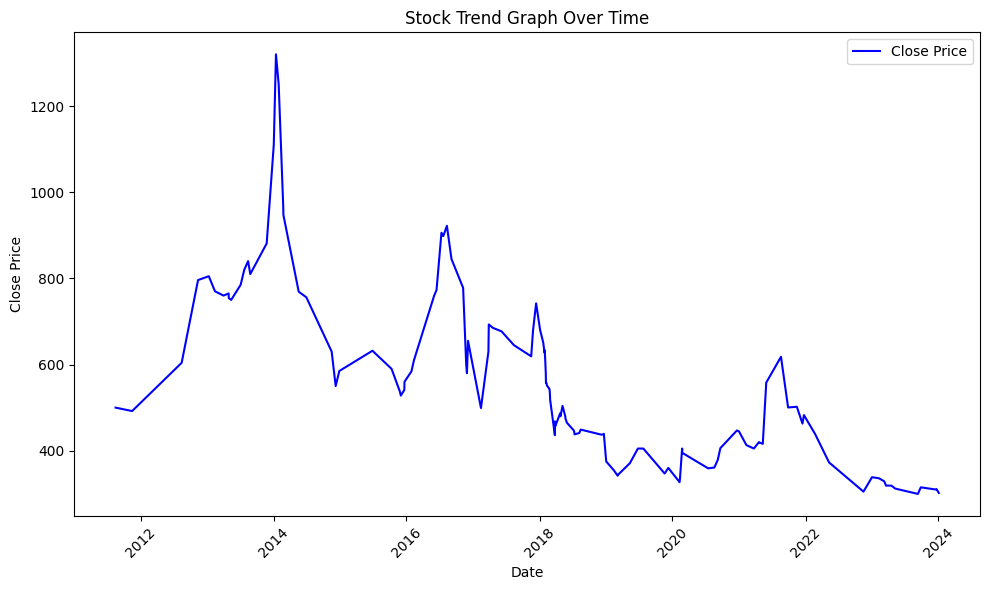

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['close'], linestyle='-', color='b', label='Close Price')
plt.title('Stock Trend Graph Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

1492